In [554]:
! pip install torch numpy pandas

# Training A Classification Neural Network Model For Titanic Survivors

This will be our introduction to tabular classification. We will first see how this works with a neural network. See the blog about MNIST digit classification for some of the theoretical justification.

In [555]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [556]:
import pandas as pd, numpy as np
train_df = pd.read_csv("./titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We need to pre process data. We have some columns that are undefined for certain passengers. 

In [557]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [558]:
modes = train_df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [559]:
train_df.fillna(modes, inplace = True)

Now we are sure that all of our items have data. No cells should be undefined.

In [560]:
train_df.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The fare has a pretty large tail. We want to smoothen this distribution.


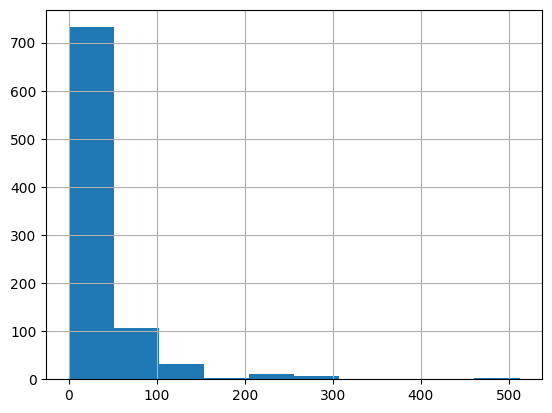

In [561]:
train_df["Fare"].hist()
print("The fare has a pretty large tail. We want to smoothen this distribution.")

We now have a nicer distribution that will be easier to work with.


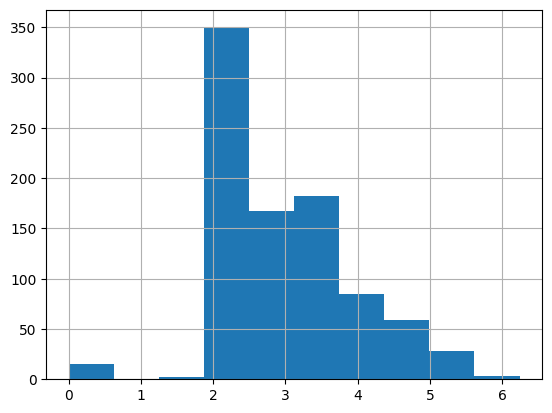

In [562]:
train_df["Fare"] = np.log(train_df["Fare"]+1)
train_df["Fare"].hist()
print("We now have a nicer distribution that will be easier to work with.")

In [563]:
train_df.describe(include = [object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [564]:
train_df = pd.get_dummies(train_df, columns=["Sex","Cabin","Embarked"],dtype=float)
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We will remove the name attribute as it is not particularly useful for our predictions.

In [565]:
train_df = train_df.drop(columns=["Name","Ticket"])
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,2.110213,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,4.280593,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,2.188856,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,3.990834,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,2.202765,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,2.639057,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,888,1,1,19.0,0,0,3.433987,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,889,0,3,24.0,1,2,3.196630,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,890,1,1,26.0,0,0,3.433987,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [566]:
import torch
from torch import tensor

labels = tensor(train_df['Survived'], dtype = torch.long)
attributes = tensor(train_df.drop(columns=['Survived']).values, dtype= torch.float)

label_atts_map = list(zip(attributes, labels))

In [567]:
from torch.utils.data import random_split, DataLoader

train_size = int(len(label_atts_map)*0.8)
val_size = len(label_atts_map) - train_size

train, valid = random_split(label_atts_map, [train_size, val_size])

train_dl = DataLoader(train, batch_size = 64, shuffle = True)
valid_dl = DataLoader(train, batch_size = 64, shuffle = True)

In [568]:
xb, yb = next(iter(train_dl))
yb.shape

torch.Size([64])

In [569]:
import torch.nn as nn
import torch.optim as opt

model = nn.Sequential(
        nn.Linear(1*158,512),
        nn.ReLU(), 
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256, 2),
)

learning_rate = 0.1

sgd = opt.SGD(model.parameters(), learning_rate)

loss_fn = nn.CrossEntropyLoss()

In [570]:
print("Parameters shape: ", next(model.parameters()).shape)

Parameters shape:  torch.Size([512, 158])


In [573]:
def validation():
    accuracy = []
    for xb, yb in valid_dl:
        predictions = torch.argmax(model(xb))
        accuracy.append((predictions == yb).float().mean())
    return round(torch.stack(accuracy).float().mean().item(),4)


def train_epoch():
    epoch_loss = np.array([])
    for xb, yb in train_dl:
        sgd.zero_grad()
        predictions = model(xb)
        loss = loss_fn(predictions, yb)
        loss.backward()
        epoch_loss = np.append(epoch_loss, loss.item())
        sgd.step()
    return epoch_loss

for ep in range(20):
    mean_loss = round(np.mean(train_epoch()),4)
    accuracy = round(validation(),4)
    print(f"Epoch #{ep} || Mean Loss: {mean_loss} || Accuracy: {accuracy}")

Epoch #0 || Mean Loss: 0.6711 || Accuracy: 0.6146
Epoch #1 || Mean Loss: 0.6595 || Accuracy: 0.6146
Epoch #2 || Mean Loss: 0.6626 || Accuracy: 0.6328
Epoch #3 || Mean Loss: 0.6714 || Accuracy: 0.6419
Epoch #4 || Mean Loss: 0.6754 || Accuracy: 0.6055
Epoch #5 || Mean Loss: 0.671 || Accuracy: 0.6328
Epoch #6 || Mean Loss: 0.671 || Accuracy: 0.6146
Epoch #7 || Mean Loss: 0.671 || Accuracy: 0.6146
Epoch #8 || Mean Loss: 0.663 || Accuracy: 0.6146
Epoch #9 || Mean Loss: 0.6542 || Accuracy: 0.6237
Epoch #10 || Mean Loss: 0.658 || Accuracy: 0.6146
Epoch #11 || Mean Loss: 0.6627 || Accuracy: 0.6237
Epoch #12 || Mean Loss: 0.672 || Accuracy: 0.6328
Epoch #13 || Mean Loss: 0.6714 || Accuracy: 0.6146
Epoch #14 || Mean Loss: 0.6669 || Accuracy: 0.6237
Epoch #15 || Mean Loss: 0.667 || Accuracy: 0.6146
Epoch #16 || Mean Loss: 0.6669 || Accuracy: 0.6237
Epoch #17 || Mean Loss: 0.667 || Accuracy: 0.6146
Epoch #18 || Mean Loss: 0.671 || Accuracy: 0.5781
Epoch #19 || Mean Loss: 0.671 || Accuracy: 0.5964


### Conclusion

We see that our accuracy is about *0.6*. This is pretty good but not the best. We'll try to see if we can create a better model in the next notebook with *Random Forests*. 
